### Credit Card Lead Prediction
#### Problem Statement
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

#### 1. Defining the problem statement
Happy Customer Bank is a mid-sized private bank wants to cross sell its credit cards to its existing customers and is looking for help in identifying customers that could show higher intent towards a recommended credit card.

#### 2. Collecting the data
Using pandas to load train and test csv files


In [90]:
import pandas as pd
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

#### 3. Exploratory Data Analysis
Printing the first five rows of the train data

In [91]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [92]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


##### Train Set Data Attributes
- Variable: Definition : Definition
- ID                   : Unique Identifier for a row 	
- Gender               : Gender of the Customer 	
- Age                  : Age of the Customer (in Years)
- Region_Code          : Code of the Region for the customers
- Occupation           : Occupation Type for the customer 
- Channel_Code         : Acquisition Channel Code for the Customer  (Encoded)
- Vintage              : Vintage for the Customer (In Months)
- Credit_Product       : If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
- Avg_Account_Balance  : Average Account Balance for the Customer in last 12 Months              
- Is_Active            : If the Customer is Active in last 3 Months
- Is_Lead(Target)      : If the Customer is interested for the Credit Card, 0 : Customer is not interested, 1 : Customer is interested

In [93]:
print("train set rows\t\t: {}".format(train.shape[0]))
print("train set columns\t: {}\n".format(train.shape[1]))
print("test set rows\t\t: {}".format(test.shape[0]))
print("test set columns\t: {}".format(test.shape[1]))

train set rows		: 245725
train set columns	: 11

test set rows		: 105312
test set columns	: 10


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
ID                     105312 non-null object
Gender                 105312 non-null object
Age                    105312 non-null int64
Region_Code            105312 non-null object
Occupation             105312 non-null object
Channel_Code           105312 non-null object
Vintage                105312 non-null int64
Credit_Product         92790 non-null object
Avg_Account_Balance    105312 non-null int64
Is_Active              105312 non-null object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [96]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [97]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [99]:
def bar_chart(feature):
    lead = train[train['Is_Lead']==1][feature].value_counts()
    not_lead = train[train['Is_Lead']==0][feature].value_counts()
    df = pd.DataFrame([lead,not_lead])
    df.index = ['Is a lead','Not a lead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

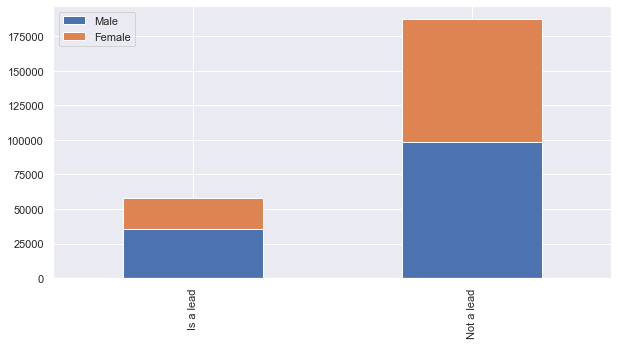

In [100]:
bar_chart('Gender')

The above chart suggests that genders really doesn't define if someone is not interested in credit cards. Among those who are interested to have credit card there are more men than woman.

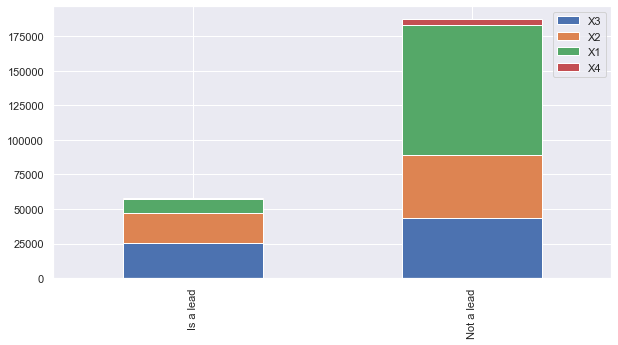

In [101]:
bar_chart('Channel_Code')

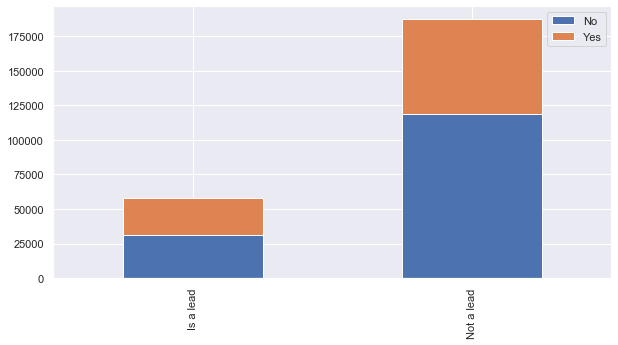

In [102]:
bar_chart('Is_Active')

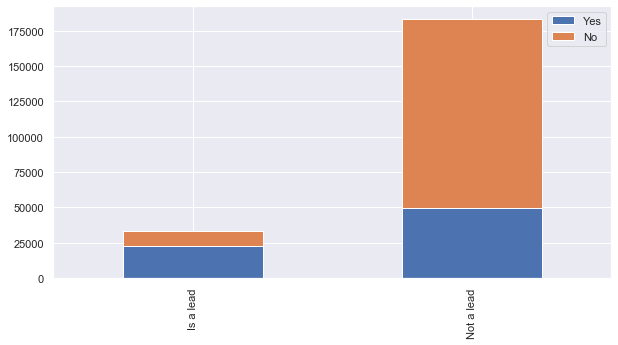

In [103]:
bar_chart('Credit_Product')

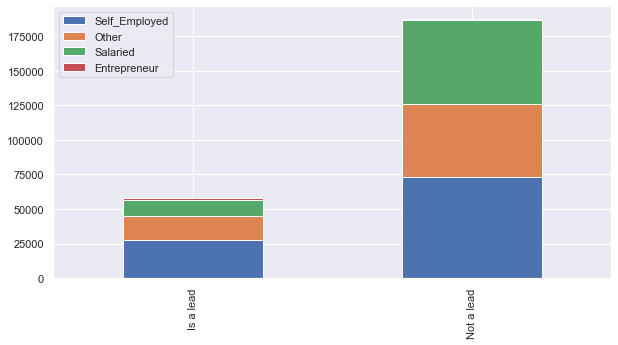

In [104]:
bar_chart('Occupation')

#### 4. Feature Engineering
The algorithms in machine learning require a numerical representation of data so that
such representations facilitate processing and statistical analysis. 

The following attributes can be looked upon for feature engineering
- Gender *
- Age *
- Region Code
- Occupation *
- Channel Code *
- Vintage
- Credit Product 
- Average Account Balance
- Is Active *

Since Gender, Occupation, Channel Code, and Is Active attributes have only few dimentions and do not have Nan values, it would be easy to map out their values to numrica values easily.

#### 4.1 Gender
Gender mapping [male:0, female: 1]

In [105]:
train_test_data = [train, test]

In [106]:
gender_mapping = {"Male": 0, "Female": 1}
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map(gender_mapping)

#### 4.2 Occupation
Occupation Mapping [Self Employed: 0, other: 1, Salaried: 2, Entreprenuer: 3]

In [107]:
occupation_mapping = {"Self_Employed": 0, "Other": 1, "Salaried": 2, "Entreprenuer": 3}
for dataset in train_test_data:
    dataset['Occupation'] = dataset['Occupation'].map(occupation_mapping)

#### 4.3 Channel Code
Channel code Mapping [X1: 0, X2: 1, X3: 2, X4: 3]

In [108]:
channel_code_mapping = {"X1": 0, "X2": 1, "X3": 2, "X4": 3}
for dataset in train_test_data:
    dataset['Channel_Code'] = dataset['Channel_Code'].map(channel_code_mapping)

#### 4.4 Is Active
Credit Product Mapping [No: 0, Yes: 1]

In [111]:
is_active_mapping = {"No": 0, "Yes": 1}
for dataset in train_test_data:
    dataset['Is_Active'] = dataset['Is_Active'].map(is_active_mapping)

#### 4.5 Age

In [123]:
print("Maximum Age: {}".format(train["Age"].max()))
print("Minimum Age: {}".format(train["Age"].min()))

Maximum Age: 85
Minimum Age: 23


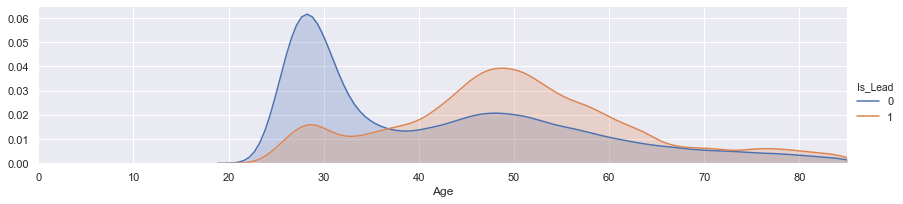

In [116]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show() 

According the the age distribution with respect to the "Is Lead" attribute, there are several cross over points.


(20, 40)

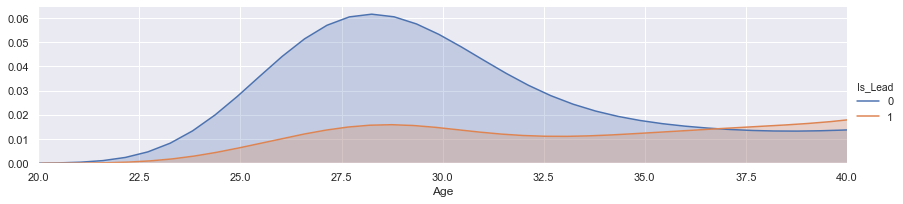

In [126]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 40)

(35, 70)

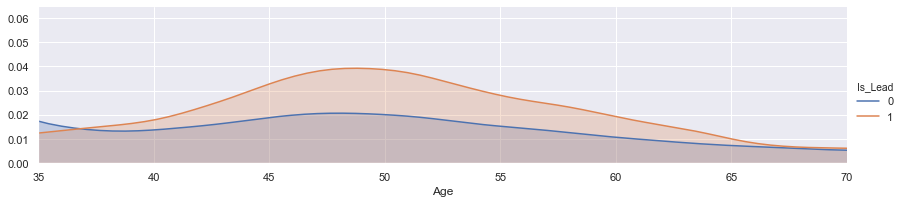

In [127]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(35, 70)

(70, 85)

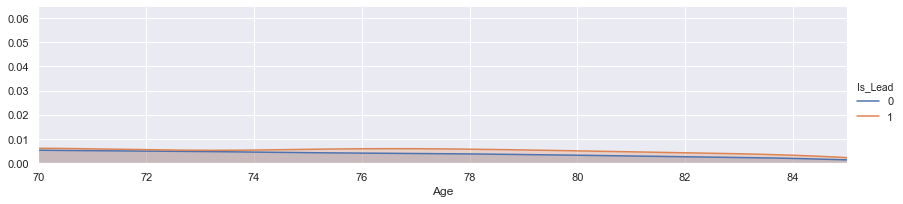

In [128]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(70, 85)

#### 4.5.1 Binning - Age
4.4.2 Binning¶
Binning/Converting Numerical Age to Categorical Variable

feature vector map:
Under 37 years old: 0
More the 37 and less than 70: 1
Greater than 70: 2


In [129]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 37, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 70), 'Age'] = 1,
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 2

#### 4.6 Region Code
